In [1]:
import numpy as np
import pandas as pd
import os
import re
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
hour_path = r'bldf_climate_0'
daily_sum_path = r'bldf_climate_daily'
sobol_file_path = r'sobol_buiding_inputs.csv' 
weather_file_path = r'ZH_standard.csv'

#select_cols = ['cooling_loads', 'dhwLoads', 'heating_loads', 'electricity_loads'] 
target_col = ['cooling_loads'] 

In [18]:
building_hour = {}
building_daily_sum = {}
for file in os.listdir(hour_path):
    if file.endswith('.csv'):
        idx = int(re.findall('\d+',file)[0])
        building_hour[idx] = pd.read_csv(os.path.join(hour_path,file),usecols=target_col)
    
for file in os.listdir(daily_sum_path):
    if file.endswith('.csv'):
        idx = int(re.findall('\d+',file)[0])
        building_daily_sum[idx] = pd.read_csv(os.path.join(daily_sum_path,file),usecols=target_col)
    
building_index = sorted(building_hour.keys())

In [19]:
print(len(building_hour))
print(building_index)

382
[51, 103, 140, 241, 312, 333, 336, 373, 394, 409, 417, 433, 452, 458, 471, 482, 485, 498, 583, 593, 596, 603, 618, 691, 743, 780, 881, 952, 973, 976, 980, 1013, 1034, 1049, 1057, 1073, 1092, 1098, 1111, 1122, 1125, 1138, 1223, 1233, 1236, 1243, 1258, 1293, 1296, 1300, 1333, 1354, 1369, 1377, 1393, 1412, 1418, 1431, 1442, 1445, 1458, 1543, 1553, 1556, 1563, 1578, 1613, 1616, 1620, 1653, 1674, 1689, 1697, 1713, 1732, 1738, 1751, 1762, 1765, 1778, 1863, 1873, 1876, 1883, 1898, 1933, 1936, 1940, 1973, 1994, 2009, 2017, 2033, 2052, 2058, 2071, 2082, 2085, 2098, 2183, 2193, 2196, 2203, 2218, 2253, 2256, 2260, 2293, 2314, 2329, 2337, 2353, 2372, 2378, 2391, 2402, 2405, 2418, 2503, 2513, 2516, 2523, 2538, 2573, 2576, 2580, 2613, 2634, 2649, 2657, 2673, 2692, 2698, 2711, 2722, 2725, 2738, 2823, 2833, 2836, 2843, 2858, 2893, 2896, 2900, 2933, 2954, 2969, 2977, 2993, 3012, 3018, 3031, 3042, 3045, 3058, 3143, 3153, 3156, 3163, 3178, 3213, 3216, 3220, 3253, 3274, 3289, 3297, 3313, 3332, 3338, 3

In [20]:
building_hour[building_index[0]]

,cooling_loads
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8755,0.0
8756,0.0
8757,0.0
8758,0.0


In [41]:
building_daily_sum[building_index[0]]

,cooling_loads
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
360,0.0
361,0.0
362,0.0
363,0.0


In [24]:
class BuildingAreaExtractor:
    def __init__(self, data_path, building_index):
        self.data_path = data_path
        self.building_index = building_index
        self.building_area = {}

    def extract_building_area(self):
        for file in os.listdir(self.data_path):
            if file.endswith('.csv'):
                idx = int(re.findall(r'\d+', file)[0])
                if idx in self.building_index:
                    file_path = os.path.join(self.data_path, file)
                    # 读取 CSV 文件的最后一行
                    df = pd.read_csv(file_path, header=None)
                    last_row_value = df.iloc[-1, 0]  # 提取最后一行的唯一列的值
                    # 假设值为字符串形式，例如 'TotalFloorArea;units;1401.5'
                    area_value = float(last_row_value.split(';')[-1])  # 提取面积值并转换为 float
                    self.building_area[idx] = area_value

    def get_building_area(self):
        return self.building_area

# 使用示例
data_path = r'C:\Users\reise\OneDrive\Jintao_Yang\energyhub_inputs\tech'  # 替换为文件所在路径
building_index = building_index  # 使用已有的 building_index 列表

# 初始化处理器
extractor = BuildingAreaExtractor(data_path, building_index)

# 提取建筑面积数据
extractor.extract_building_area()

# 获取并输出建筑面积数据
building_area_dict = extractor.get_building_area()
print(building_area_dict)

{10009: 1146.5625, 10017: 361.625, 10033: 560.078125, 10052: 409.6875, 10058: 248.8125, 10071: 1595.375, 10082: 1871.5, 10085: 234.1875, 10098: 217.875, 1013: 329.3125, 10183: 79.21875, 10193: 228.8125, 10196: 250.25, 10203: 204.3125, 10218: 1112.03125, 103: 281.0, 1034: 1307.4375, 1049: 1146.5625, 1057: 361.625, 1073: 560.078125, 1092: 409.6875, 1098: 248.8125, 1111: 1595.375, 1122: 1871.5, 1125: 234.1875, 1138: 217.875, 1223: 79.21875, 1233: 228.8125, 1236: 250.25, 1243: 204.3125, 1258: 1112.03125, 1293: 866.796875, 1296: 731.875, 1300: 222.140625, 1333: 329.3125, 1354: 1307.4375, 1369: 1146.5625, 1377: 361.625, 1393: 560.078125, 140: 301.828125, 1412: 409.6875, 1418: 248.8125, 1431: 1595.375, 1442: 1871.5, 1445: 234.1875, 1458: 217.875, 1543: 79.21875, 1553: 228.8125, 1556: 250.25, 1563: 204.3125, 1578: 1112.03125, 1613: 866.796875, 1616: 731.875, 1620: 222.140625, 1653: 329.3125, 1674: 1307.4375, 1689: 1146.5625, 1697: 361.625, 1713: 560.078125, 1732: 409.6875, 1738: 248.8125, 1751

In [26]:
# 建立一个新的字典，用于存储每个建筑的单位面积冷负荷
building_hour_per_area = {}

# 遍历 building_index 列表（之前已经排序）
for idx in building_hour:
    if idx in building_area_dict:
        # 获取冷负荷数据（DataFrame）和建筑面积（float）
        cooling_load = building_hour[idx]
        area = building_area_dict[idx]
        
        # 计算单位面积冷负荷并存储在新的字典中
        cooling_load_per_area = cooling_load / area
        building_hour_per_area[idx] = cooling_load_per_area

building_hour_per_area[51].head()

,cooling_loads
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [8]:
weather_columns = [
    'Outside Dry-Bulb Temperature', 
    'Direct Normal Solar', 
    'Diffuse Horizontal Solar'
]
weather = pd.read_csv(weather_file_path,encoding_errors='ignore',usecols=weather_columns).drop(index=0).reset_index(drop=True)
weather

,Outside Dry-Bulb Temperature,Direct Normal Solar,Diffuse Horizontal Solar
0,8.8,0,0
1,8.6,0,0
2,8.4,0,0
3,8.3,0,0
4,8.2,0,0
...,...,...,...
8755,0.2,0,0
8756,-0.1,0,0
8757,-0.3,0,0
8758,-0.5,0,0


In [9]:
sobol_cols = [
    'Ventilation', 'W2WR', 'U-value walls', 'U-value windows',
    'U-value roof', 'U-value floors', 'Infiltration'
]
sobol = pd.read_csv(sobol_file_path,usecols=['1:nfix']+sobol_cols)
sobol.head()

,1:nfix,Ventilation,W2WR,U-value walls,U-value roof,U-value floors,U-value windows,Infiltration
0,1,0.000295,0.837793,0.344121,0.344121,0.344121,1.188463,0.000050
1,2,0.000229,0.595285,0.828834,0.828834,0.828834,2.417690,0.000093
2,3,0.000142,0.485669,0.053773,0.053773,0.053773,1.100675,0.000047
3,4,0.000273,0.332990,0.556044,0.556044,0.556044,1.875587,0.000069
4,5,0.000196,0.648765,1.043078,1.043078,1.043078,1.434067,0.000057


In [10]:
filtered_sobol = sobol[sobol['1:nfix'].isin(building_index)]
print(filtered_sobol)

       1:nfix  Ventilation      W2WR  U-value walls  U-value roof  \
50         51     0.000211  0.366828       0.696696      0.696696   
102       103     0.000248  0.452700       0.963344      0.963344   
139       140     0.000193  0.136256       0.318094      0.318094   
240       241     0.000248  0.400547       0.426064      0.426064   
311       312     0.000155  0.275021       0.158561      0.158561   
...       ...          ...       ...            ...           ...   
10182   10183     0.000259  0.576356       0.544421      0.544421   
10192   10193     0.000183  0.622585       0.383128      0.383128   
10195   10196     0.000211  0.133677       0.498317      0.498317   
10202   10203     0.000168  0.174757       0.151916      0.151916   
10217   10218     0.000283  0.737313       0.529194      0.529194   

       U-value floors  U-value windows  Infiltration  
50           0.696696         2.387880      0.000091  
102          0.963344         2.198799      0.000080  
139   

C:\Users\reise\anaconda3\envs\24sp\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reise\anaconda3\envs\24sp\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\reise\AppData\Local\Temp\ipykernel_33692\3917483183.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sobol['Cluster'] = kmeans.labels_


Cluster
5    75
2    64
1    49
0    48
3    47
4    47
7    32
6    20
Name: count, dtype: int64


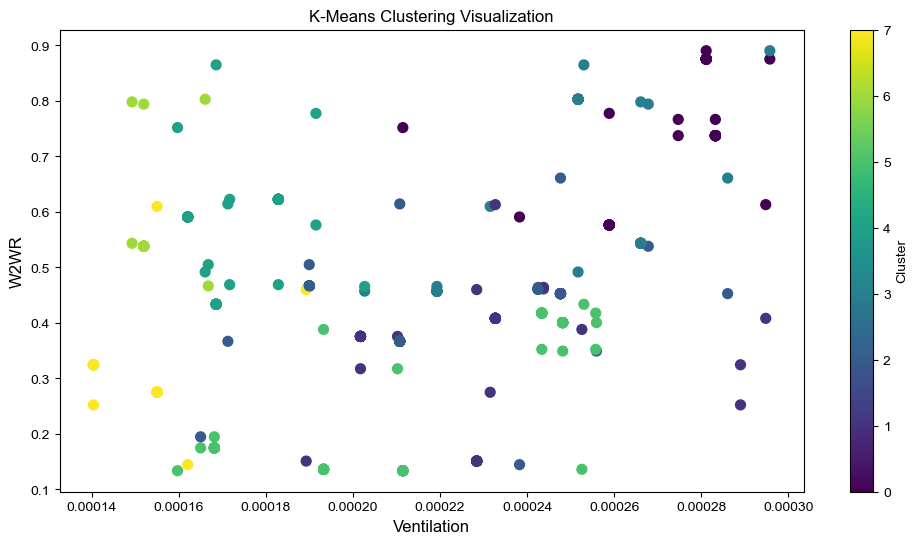

     1:nfix  Ventilation      W2WR  U-value walls  U-value roof  \
50       51     0.000211  0.366828       0.696696      0.696696   
102     103     0.000248  0.452700       0.963344      0.963344   
139     140     0.000193  0.136256       0.318094      0.318094   
240     241     0.000248  0.400547       0.426064      0.426064   
311     312     0.000155  0.275021       0.158561      0.158561   

     U-value floors  U-value windows  Infiltration  Cluster  
50         0.696696         2.387880      0.000091        2  
102        0.963344         2.198799      0.000080        2  
139        0.318094         2.022584      0.000074        5  
240        0.426064         2.464385      0.000100        5  
311        0.158561         0.830725      0.000031        7  


In [37]:
# 选择聚类特征
clustering_features = ['Ventilation', 'W2WR', 'U-value walls', 'U-value windows']

# 提取特征用于聚类
data_to_cluster = filtered_sobol[clustering_features]

# 检查是否有缺失值并处理
data_to_cluster = data_to_cluster.dropna()

# 数据标准化
scaler = StandardScaler()
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

# 初始化 K-Means 模型，指定 8 个聚类
kmeans = KMeans(n_clusters=8, random_state=42)

# 进行聚类
kmeans.fit(data_to_cluster_scaled)

# 将聚类结果添加到原始数据中
filtered_sobol['Cluster'] = kmeans.labels_

# 查看每个类别的分布
print(filtered_sobol['Cluster'].value_counts())

# 将聚类结果保存为文件（可选）
# filtered_sobol.to_csv("clustered_sobol_results.csv", index=False)  # 保存为 CSV

# 可视化 (选择两个特征)
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'
plt.scatter(data_to_cluster['Ventilation'], data_to_cluster['W2WR'], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Ventilation', fontsize=12)
plt.ylabel('W2WR', fontsize=12)
plt.title('K-Means Clustering Visualization', fontsize=12, bbox_inches='tight')
plt.savefig('clustering_featrues.png', dpi=300)
plt.show()

# 输出前 5 行结果
print(filtered_sobol.head())

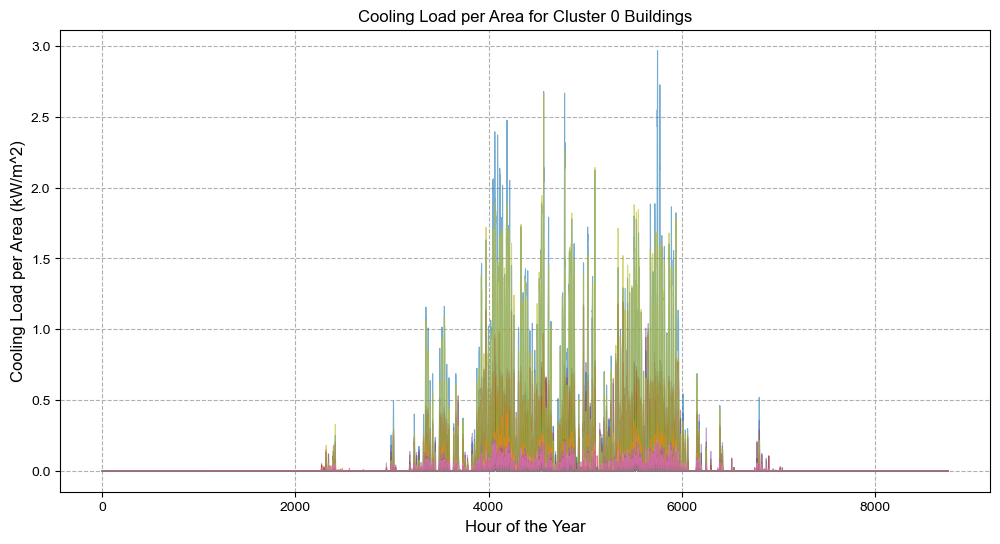

In [38]:
# 打印 Cluster 0 中所有 building_index 的 cooling load 曲线图
cluster_0_indices = filtered_sobol[filtered_sobol['Cluster'] == 0]['1:nfix'].tolist()

plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'
for idx in cluster_0_indices:
    if idx in building_hour_per_area:
        plt.plot(building_hour_per_area[idx], linewidth=0.8, alpha=0.6)

plt.xlabel('Hour of the Year', fontsize=12)
plt.ylabel('Cooling Load per Area (kW/m^2)', fontsize=12)
plt.title('Cooling Load per Area for Cluster 0 Buildings', fontsize=12)
plt.grid(True, linestyle='--')
plt.savefig('cooling_load_cluster_0.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
# 建立一个新的字典，用于存储每个建筑的单位面积冷负荷
building_daily_sum_per_area = {}

# 遍历 building_index 列表（之前已经排序）
for idx in building_daily_sum:
    if idx in building_area_dict:
        # 获取冷负荷数据（DataFrame）和建筑面积（float）
        cooling_load = building_daily_sum[idx]
        area = building_area_dict[idx]
        
        # 计算单位面积冷负荷并存储在新的字典中
        cooling_load_per_area = cooling_load / area
        building_daily_sum_per_area[idx] = cooling_load_per_area

building_daily_sum_per_area[51]

,cooling_loads
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
360,0.0
361,0.0
362,0.0
363,0.0


In [55]:
# 对 building_daily_sum_per_area 字典中的数据进行聚类
# 将所有数据转换为 DataFrame，以便进行聚类
daily_data_list = []
index_list = []
for idx, daily_load in building_daily_sum_per_area.items():
    daily_data_list.append(daily_load.values.flatten())
    index_list.append(idx)

# 转换为 DataFrame
building_daily_data = pd.DataFrame(daily_data_list, index=index_list)

# 初始化 K-Means 模型，指定 8 个聚类
kmeans_daily = KMeans(n_clusters=8, random_state=42)

# 进行聚类
kmeans_daily.fit(building_daily_data)

# 将聚类结果添加到 DataFrame 中
building_daily_data['Cluster'] = kmeans_daily.labels_

# 查看每个类别的分布
print(building_daily_data['Cluster'].value_counts())

Cluster
0    204
5     95
3     45
6     19
7      8
1      7
4      2
2      2
Name: count, dtype: int64


C:\Users\reise\anaconda3\envs\24sp\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reise\anaconda3\envs\24sp\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


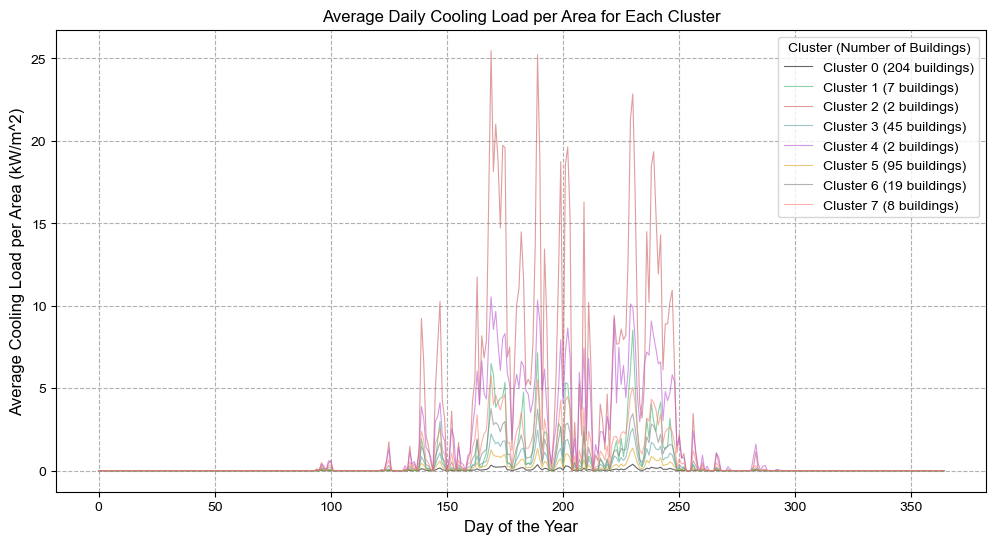

In [58]:
# 可视化聚类结果
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'
colors = ['black', 'mediumseagreen', 'indianred', 'cadetblue', 'mediumorchid', 'goldenrod', 'gray', 'salmon']

for cluster in range(8):
    cluster_data = building_daily_data[building_daily_data['Cluster'] == cluster]
    num_buildings = len(cluster_data)
    cluster_mean = cluster_data.mean(axis=0).drop('Cluster')
    plt.plot(cluster_mean.values, label=f'Cluster {cluster} ({num_buildings} buildings)', color=colors[cluster], linewidth=0.8, alpha=0.6)

plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Average Cooling Load per Area (kW/m^2)', fontsize=12)
plt.title('Average Daily Cooling Load per Area for Each Cluster', fontsize=12)
plt.legend(title='Cluster (Number of Buildings)')
plt.grid(True, linestyle='--')
plt.savefig('average_daily_cooling_load_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

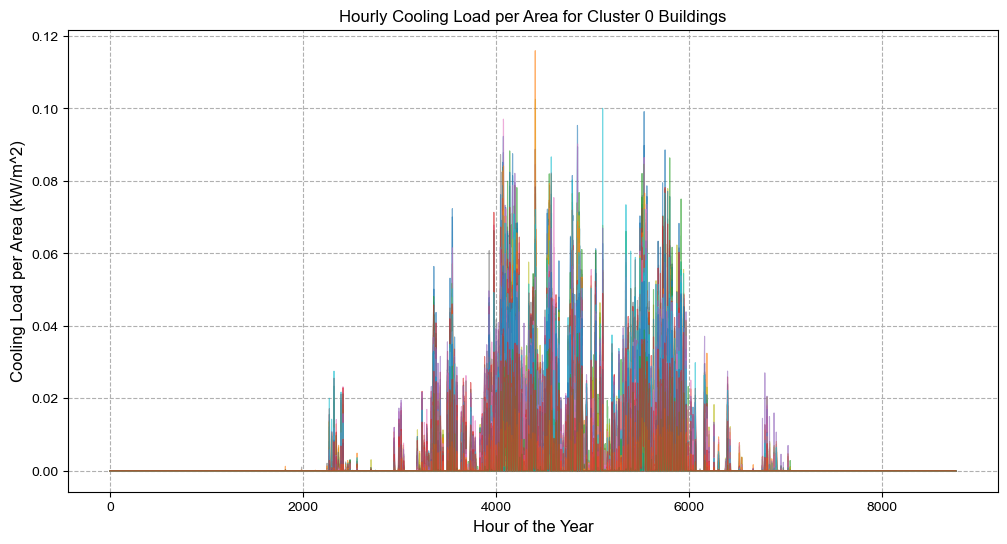

In [59]:
# 打印 Cluster 0 中所有 building_index 的 hourly load per area 曲线图
cluster_0_indices = building_daily_data[building_daily_data['Cluster'] == 0].index.tolist()
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'
for idx in cluster_0_indices:
    if idx in building_hour_per_area:
        plt.plot(building_hour_per_area[idx], linewidth=0.8, alpha=0.6)

plt.xlabel('Hour of the Year', fontsize=12)
plt.ylabel('Cooling Load per Area (kW/m^2)', fontsize=12)
plt.title('Hourly Cooling Load per Area for Cluster 0 Buildings', fontsize=12)
plt.grid(True, linestyle='--')
# plt.savefig('hourly_cooling_load_cluster_0_all.png', dpi=300, bbox_inches='tight')
plt.savefig('cooling_load_cluster_0_second.png', dpi=300, bbox_inches='tight')
plt.show()